In [5]:
!pip install opendatasets

import opendatasets as od
od.download("https://www.kaggle.com/datasets/zlatan599/garbage-dataset-classification")

import pandas as pd
data = pd.read_csv("/content/garbage-dataset-classification/Garbage_Dataset_Classification/metadata.csv")

data.head()

Skipping, found downloaded files in "./garbage-dataset-classification" (use force=True to force download)


,filename,label
0,cardboard_02038.jpg,cardboard
1,cardboard_02320.jpg,cardboard
2,cardboard_01728.jpg,cardboard
3,cardboard_00093.jpg,cardboard
4,cardboard_00094.jpg,cardboard


Image loaded! Shape: (256, 256, 3)


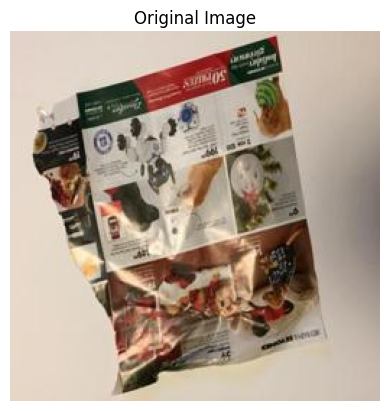

In [6]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

image_path = "/content/garbage-dataset-classification/Garbage_Dataset_Classification/images/paper/paper_00068.jpg"
img = Image.open(image_path)
img_array = np.array(img)

print(f"Image loaded! Shape: {img_array.shape}")
plt.imshow(img_array)
plt.title("Original Image")
plt.axis('off')
plt.show()

In [7]:
import os
from PIL import Image
import numpy as np
from tqdm import tqdm

# Paths
root_dir = "/content/garbage-dataset-classification/Garbage_Dataset_Classification/images"
output_dir = "/content/resized_images"
os.makedirs(output_dir, exist_ok=True)

# Target size
target_size = (128, 128)

# Walk through each class folder
for class_name in os.listdir(root_dir):
    class_path = os.path.join(root_dir, class_name)
    save_class_path = os.path.join(output_dir, class_name)
    os.makedirs(save_class_path, exist_ok=True)

    for fname in tqdm(os.listdir(class_path), desc=f"Resizing {class_name}"):
        fpath = os.path.join(class_path, fname)
        img = Image.open(fpath).convert("RGB")      # ensure 3 channels
        img = img.resize(target_size)               # resize
        img.save(os.path.join(save_class_path, fname))


Resizing paper: 100%|██████████| 2315/2315 [00:05<00:00, 430.84it/s]


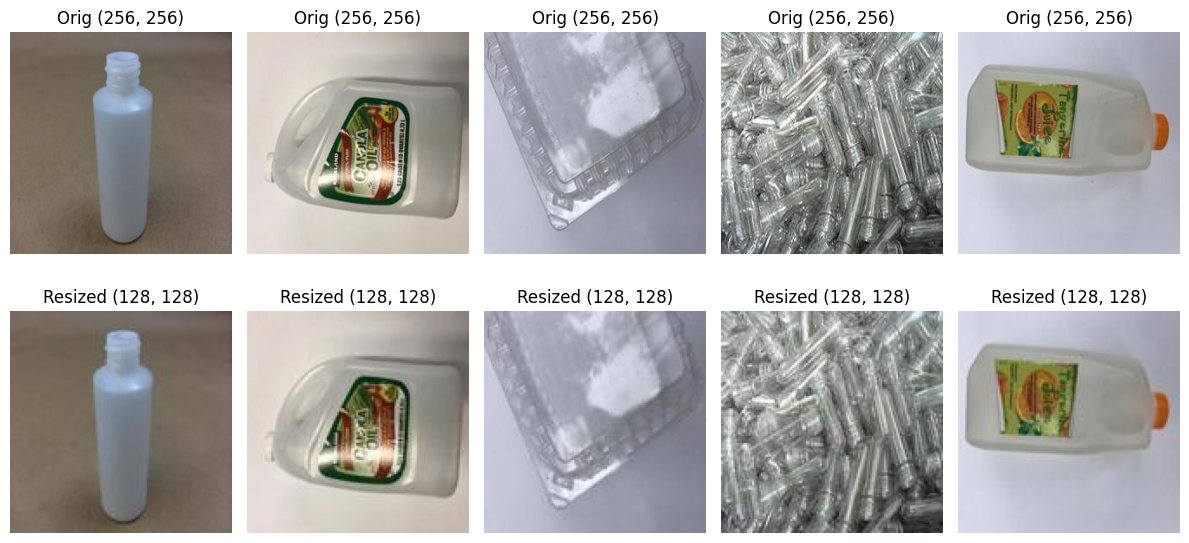

In [14]:
import random

cls = "plastic"  # choose a class
orig_files = random.sample(os.listdir(os.path.join(root_dir, cls)), 5)

plt.figure(figsize=(12,6))
for i, fname in enumerate(orig_files):
    orig = Image.open(os.path.join(root_dir, cls, fname))
    resized = Image.open(os.path.join(output_dir, cls, fname))

    plt.subplot(2,5,i+1)
    plt.imshow(orig)
    plt.title(f"Orig {orig.size}")
    plt.axis("off")

    plt.subplot(2,5,i+6)
    plt.imshow(resized)
    plt.title(f"Resized {resized.size}")
    plt.axis("off")

plt.tight_layout()
plt.show()

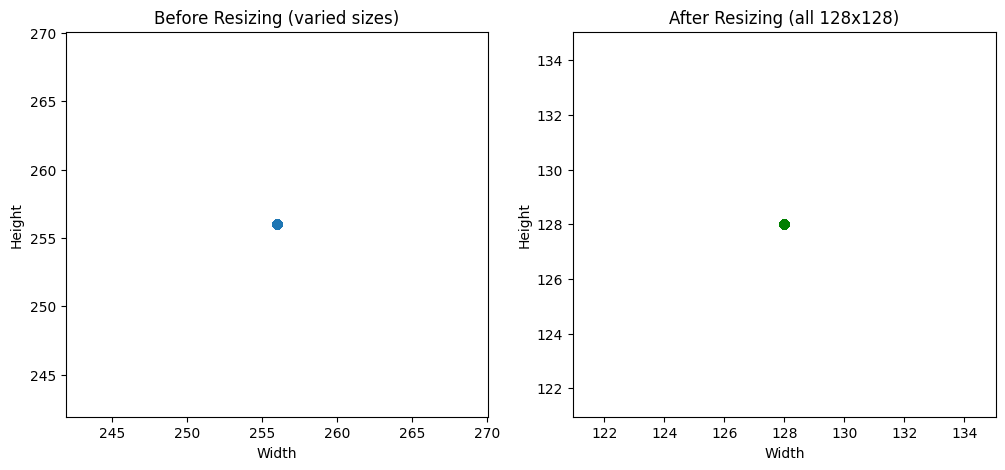

In [15]:
# Collect sizes before resizing
sizes_before = []
for cls in os.listdir(root_dir):
    for fname in os.listdir(os.path.join(root_dir, cls))[:200]:  # sample 200 per class
        img = Image.open(os.path.join(root_dir, cls, fname))
        sizes_before.append(img.size)

widths_before, heights_before = zip(*sizes_before)

# After resizing
sizes_after = []
for cls in os.listdir(output_dir):
    for fname in os.listdir(os.path.join(output_dir, cls))[:200]:
        img = Image.open(os.path.join(output_dir, cls, fname))
        sizes_after.append(img.size)

widths_after, heights_after = zip(*sizes_after)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(widths_before, heights_before, alpha=0.5)
plt.title("Before Resizing (varied sizes)")
plt.xlabel("Width")
plt.ylabel("Height")

plt.subplot(1,2,2)
plt.scatter(widths_after, heights_after, alpha=0.5, color="green")
plt.title("After Resizing (all 128x128)")
plt.xlabel("Width")
plt.ylabel("Height")

plt.show()

In [9]:
!ls /content/resized_images


cardboard  glass  metal  paper	plastic  trash


In [10]:
img = Image.open("/content/resized_images/paper/paper_00068.jpg")
print(img.size)  # should print (128, 128)


(128, 128)


Resized image size: (128, 128)


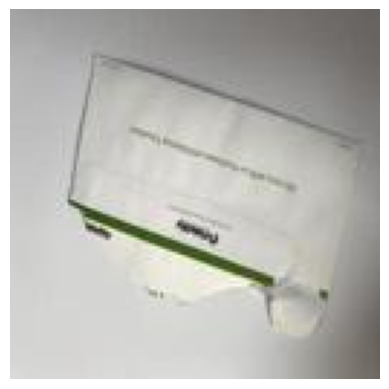

In [11]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Example: first file inside the "paper" class
sample_path = "/content/resized_images/paper"
sample_file = os.listdir(sample_path)[0]
img = Image.open(os.path.join(sample_path, sample_file))

print("Resized image size:", img.size)
plt.imshow(img)
plt.axis("off")
plt.show()


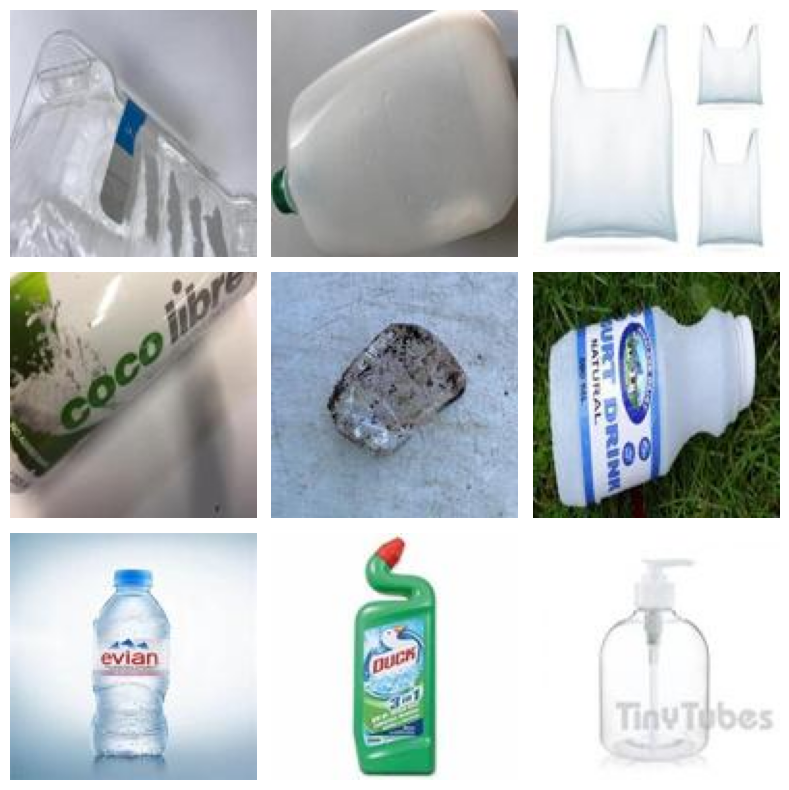

In [12]:
from itertools import islice

folder = "/content/resized_images/plastic"  # choose a class
files  = list(islice(os.listdir(folder), 9))  # first 9 images

plt.figure(figsize=(8,8))
for i, f in enumerate(files):
    img = Image.open(os.path.join(folder, f))
    plt.subplot(3,3,i+1)
    plt.imshow(img)
    plt.axis("off")
plt.tight_layout()
plt.show()
